# EDA

Se importan las bibliotecas necesarias para el análisis de los datos.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Todos los archivos ya han pasado por el proceso de ETL, así que se cargarán en Dataframes para su Análisis Exploratorio de Datos.

In [91]:
df_games = pd.read_parquet('games_cleaned.parquet')
df_reviews = pd.read_parquet('reviews_cleaned.parquet')
df_items = pd.read_parquet('items_cleaned.parquet')

### Games

1. Frecuencia de géneros: ¿Cuáles son los géneros más comunes? ¿Cuáles son los menos comunes? Esto nos da una idea general de la distribución de los géneros en el conjunto de datos.

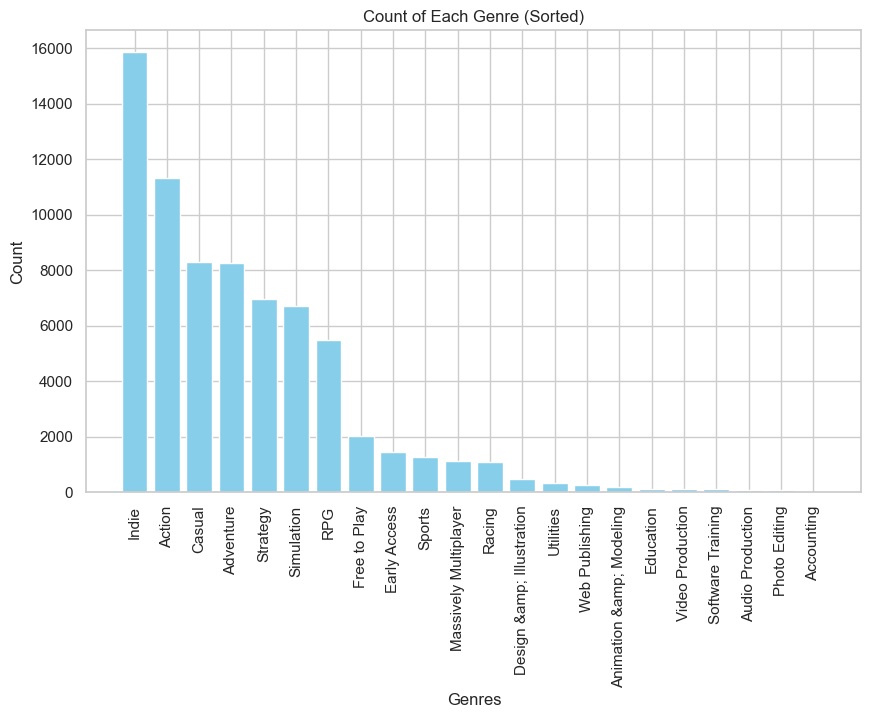

In [92]:
# Aplanar todas las listas en una sola lista
all_genres = [genre for sublist in df_games['genres'] if sublist is not None for genre in sublist]

# Contar cuántas veces aparece cada género
genre_counts = Counter(all_genres)

# Convertir el Counter a un DataFrame para graficar más fácilmente
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Ordenar los géneros de mayor a menor cantidad
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Crear el gráfico de barras con los géneros ordenados
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Each Genre (Sorted)')
plt.xticks(rotation=90)  # Rotar las etiquetas en el eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

2. Distribución de precios: ¿Cuál es el precio promedio, mínimo y máximo de los juegos? ¿Cómo se distribuyen los precios? ¿Hay muchos juegos gratuitos?

In [93]:
# Calcular el precio promedio, mínimo y máximo
precio_promedio = df_games['price'].mean()
precio_minimo = df_games['price'].min()
precio_maximo = df_games['price'].max()

# Mostrar los resultados
print(f'Precio promedio: {precio_promedio}')
print(f'Precio mínimo: {precio_minimo}')
print(f'Precio máximo: {precio_maximo}')

Precio promedio: 8.89601489091914
Precio mínimo: 0.0
Precio máximo: 995.0


In [94]:
# Contar la cantidad de juegos gratuitos (precio == 0)
juegos_gratuitos = (df_games['price'] == 0).sum()

print(f'Número de juegos gratuitos: {juegos_gratuitos}')

Número de juegos gratuitos: 1908


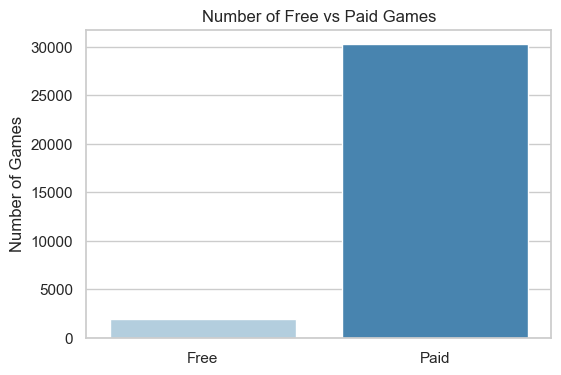

In [95]:
# Crear un gráfico de barras para mostrar la cantidad de juegos gratuitos y de pago
plt.figure(figsize=(6, 4))
sns.barplot(x=['Free', 'Paid'], y=[juegos_gratuitos, len(df_games) - juegos_gratuitos], 
            hue=['Free', 'Paid'], palette='Blues', legend=False)

# Agregar etiquetas y título
plt.ylabel('Number of Games')
plt.title('Number of Free vs Paid Games')

# Mostrar el gráfico
plt.show()

3. Distribución de años de lanzamiento: ¿En qué años se lanzaron la mayoría de los juegos?

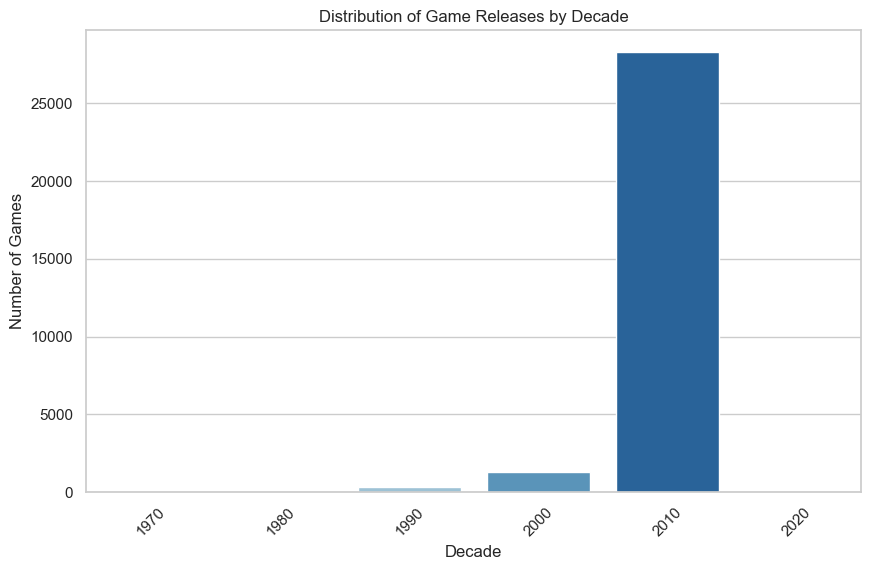

In [96]:
# Filtrar los años que no son 0
df_games = df_games[df_games['year'] != 0]

# Crear una nueva columna 'decade' que agrupe los años por década
df_games['decade'] = (df_games['year'] // 10) * 10

# Contar cuántos juegos se lanzaron en cada década
decade_counts = df_games['decade'].value_counts().sort_index()

# Crear un gráfico de barras para mostrar la distribución de los años de lanzamiento por década
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, hue=decade_counts.index, palette='Blues', legend=False)

# Agregar etiquetas y título
plt.xlabel('Decade')
plt.ylabel('Number of Games')
plt.title('Distribution of Game Releases by Decade')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

4. Desarrolladores más prolíficos: ¿Qué desarrolladores tienen más juegos en el conjunto de datos?

In [97]:
# Contar cuántos juegos tiene cada desarrollador
developer_counts = df_games['developer'].value_counts()

# Mostrar los desarrolladores con más juegos
print(developer_counts)

developer
Ubisoft - San Francisco                  1259
SmiteWorks USA, LLC                       813
Dovetail Games                            253
KOEI TECMO GAMES CO., LTD.                232
Paradox Development Studio                156
                                         ... 
Peter Turcan                                1
ImageCode LLC.                              1
DreamInCode B.V.,Squadron Interactive       1
Patrick Hofmann                             1
SyKoHPaTh                                   1
Name: count, Length: 10919, dtype: int64


C:\Users\Sarita\AppData\Local\Temp\ipykernel_17532\3923658544.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.values, y=top_developers.index, palette='Blues')


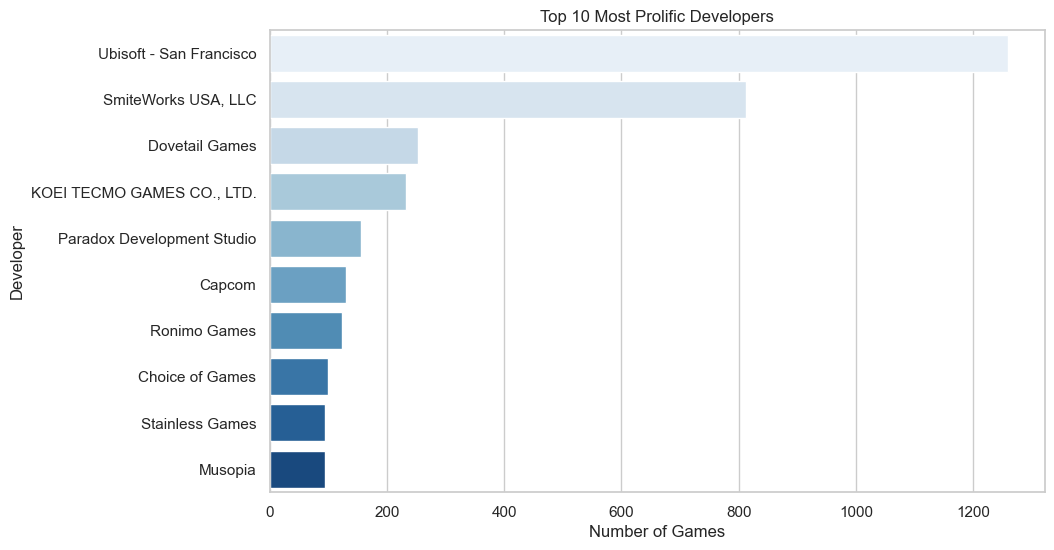

In [98]:
# Seleccionar los top 10 desarrolladores más prolíficos
top_developers = developer_counts.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_developers.values, y=top_developers.index, palette='Blues')

# Agregar etiquetas y título
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.title('Top 10 Most Prolific Developers')

# Mostrar el gráfico
plt.show()

5. Relación entre precio y año de lanzamiento.

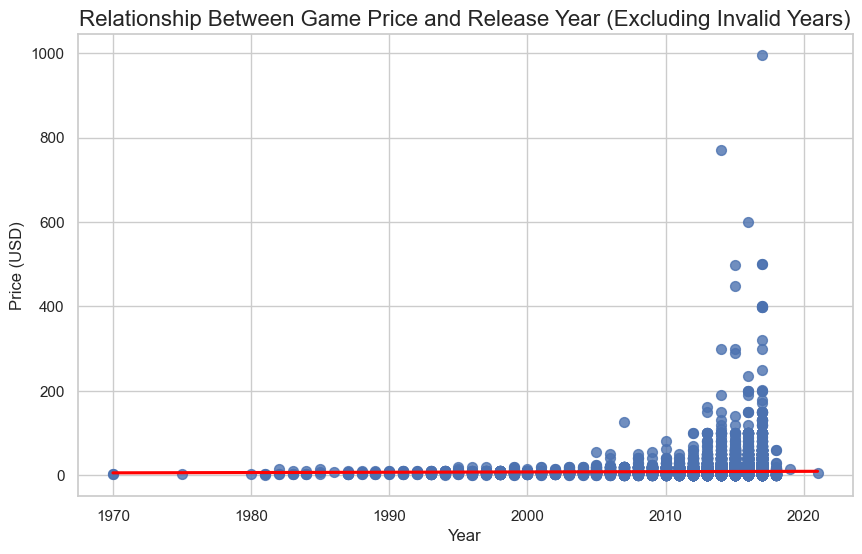

In [99]:
# Filtrar los juegos con años mayores a 0
df_filtered = df_games[(df_games['year'] > 0)]

# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de dispersión con una línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='price', data=df_filtered, scatter_kws={'s':50}, line_kws={'color':'red'}, marker='o', ci=None)

# Etiquetas y título del gráfico
plt.title('Relationship Between Game Price and Release Year (Excluding Invalid Years)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Mostrar el gráfico
plt.show()

### Reviews

1. ¿La mayoría de las recomendaciones son positivas, negativas o neutrales? Distribución de las calificaciones de sentimiento. 

In [100]:
# Contar la cantidad de reseñas para cada categoría de sentimiento
sentiment_counts = df_reviews['review'].value_counts()

# Crear etiquetas para el gráfico
sentiment_labels = ['Negative (0)', 'Neutral (1)', 'Positive (2)']

# Ordenar los resultados según las etiquetas de sentimiento
sentiment_counts = sentiment_counts.sort_index()

C:\Users\Sarita\AppData\Local\Temp\ipykernel_17532\2483036894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=sentiment_counts.values, palette='Blues')


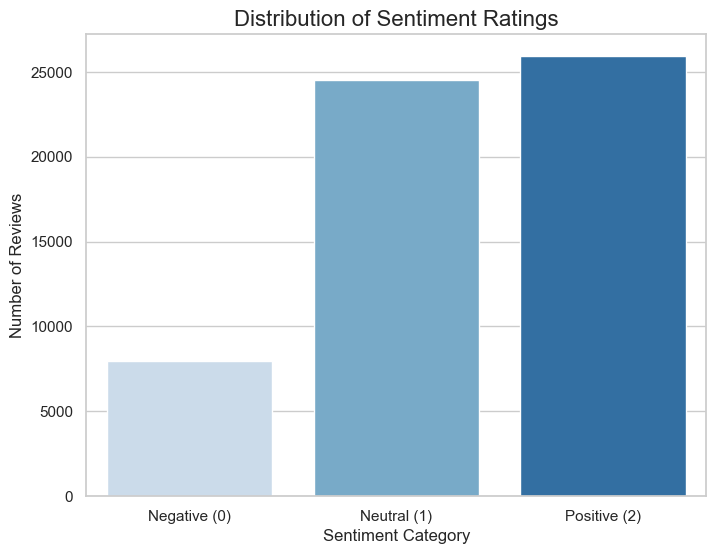

In [101]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=sentiment_counts.values, palette='Blues')

# Etiquetas y título del gráfico
plt.title('Distribution of Sentiment Ratings', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Mostrar el gráfico
plt.show()

2. Calcular la media, mediana, moda y desviación estándar de la columna review. Esto dará una idea de la tendencia central y dispersión de los sentimientos.

In [102]:
# Calcular estadísticas descriptivas
mean_sentiment = df_reviews['review'].mean()
median_sentiment = df_reviews['review'].median()
mode_sentiment = df_reviews['review'].mode()[0]  # Obtener el valor más común
std_sentiment = df_reviews['review'].std()

# Mostrar resultados
print(f"Mean (Media): {mean_sentiment}")
print(f"Median (Mediana): {median_sentiment}")
print(f"Mode (Moda): {mode_sentiment}")
print(f"Standard Deviation (Desviación estándar): {std_sentiment}")

Mean (Media): 1.3071999452345502
Median (Mediana): 1.0
Mode (Moda): 2
Standard Deviation (Desviación estándar): 0.6969501662209749


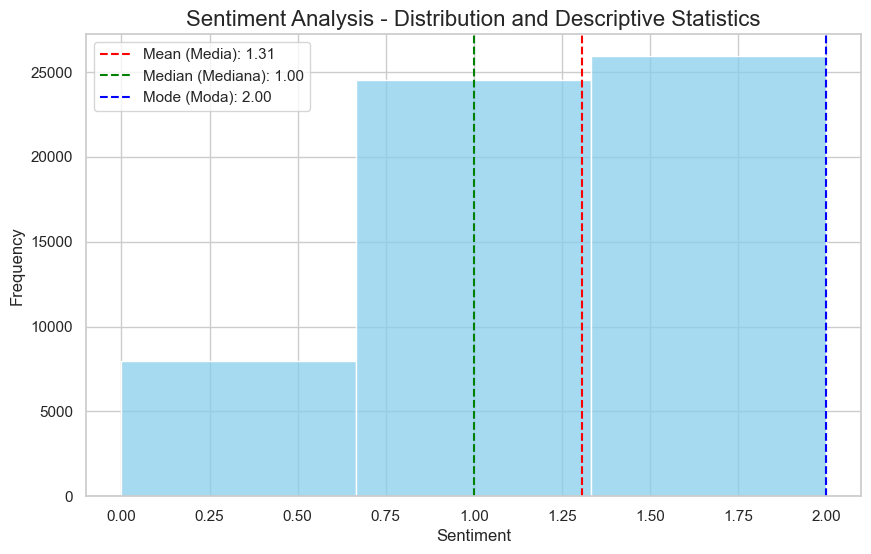

In [103]:
# Crear el histograma de la distribución de los sentimientos
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['review'], bins=3, kde=False, color='skyblue')

# Añadir líneas para la media, mediana y moda
plt.axvline(mean_sentiment, color='red', linestyle='--', label=f'Mean (Media): {mean_sentiment:.2f}')
plt.axvline(median_sentiment, color='green', linestyle='--', label=f'Median (Mediana): {median_sentiment:.2f}')
plt.axvline(mode_sentiment, color='blue', linestyle='--', label=f'Mode (Moda): {mode_sentiment:.2f}')

# Etiquetas y título
plt.title('Sentiment Analysis - Distribution and Descriptive Statistics', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

3. Analizar qué ítems son recomendados con mayor frecuencia.

In [104]:
# Contar cuántas veces cada ítem fue recomendado (si la columna recommend tiene 1 para recomendado)
recommendations_per_item = df_reviews[df_reviews['recommend'] == 1].groupby('item_id')['recommend'].count().reset_index()

# Renombrar las columnas para mayor claridad
recommendations_per_item.columns = ['item_id', 'recommend_count']

# Mostrar los primeros resultados
print(recommendations_per_item.head())

  item_id  recommend_count
0      10               55
1   10090               50
2   10130                2
3   10140                1
4   10150                9


C:\Users\Sarita\AppData\Local\Temp\ipykernel_17532\822632379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_id', y='recommend_count', data=top_recommended_items, palette='Blues_d')


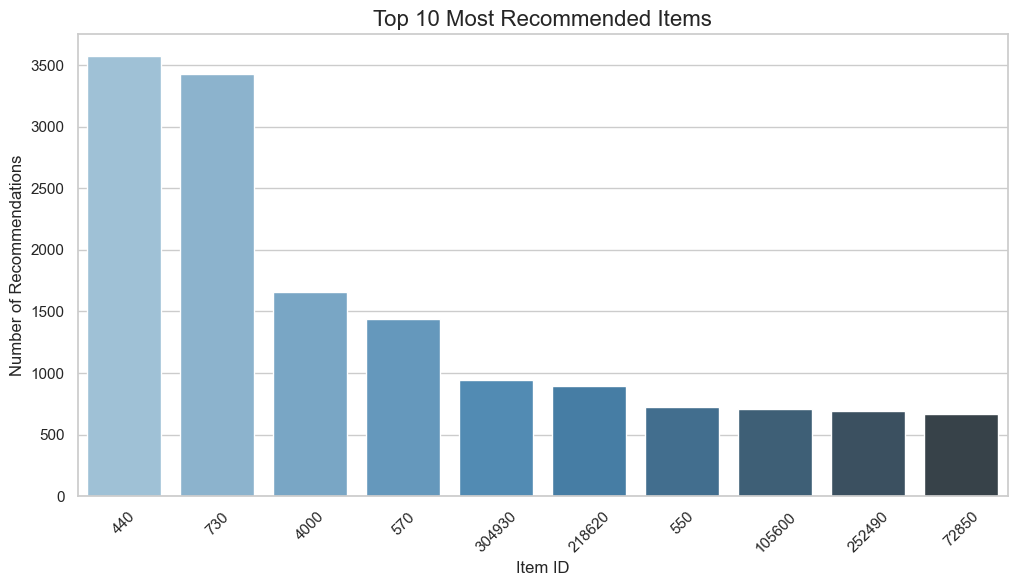

In [105]:
# Ordenar los ítems por la cantidad de recomendaciones y seleccionar los 10 primeros
top_recommended_items = recommendations_per_item.sort_values(by='recommend_count', ascending=False).head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='item_id', y='recommend_count', data=top_recommended_items, palette='Blues_d')

# Etiquetas y título del gráfico
plt.title('Top 10 Most Recommended Items', fontsize=16)
plt.xlabel('Item ID', fontsize=12)
plt.ylabel('Number of Recommendations', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

### Items

1. Análisis descriptivo de la variable tiempo total jugado.

In [106]:
# Calcular el tiempo mínimo, máximo y promedio para el tiempo jugado (playtime_forever)
min_time = df_items['playtime_forever'].min()
max_time = df_items['playtime_forever'].max()
mean_time = df_items['playtime_forever'].mean()

# Mostrar los resultados
print(f"Tiempo mínimo de juego: {min_time} horas")
print(f"Tiempo máximo de juego: {max_time} horas")
print(f"Promedio de tiempo de juego: {mean_time} horas")

Tiempo mínimo de juego: 0.0 horas
Tiempo máximo de juego: 642773.0 horas
Promedio de tiempo de juego: 990.5510950402474 horas


2. ¿Qué juegos son los más populares en términos de tiempo total jugado?

C:\Users\Sarita\AppData\Local\Temp\ipykernel_17532\1155357704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playtime_forever', y='item_name', data=top_10_most_played_games, palette='Blues_d')


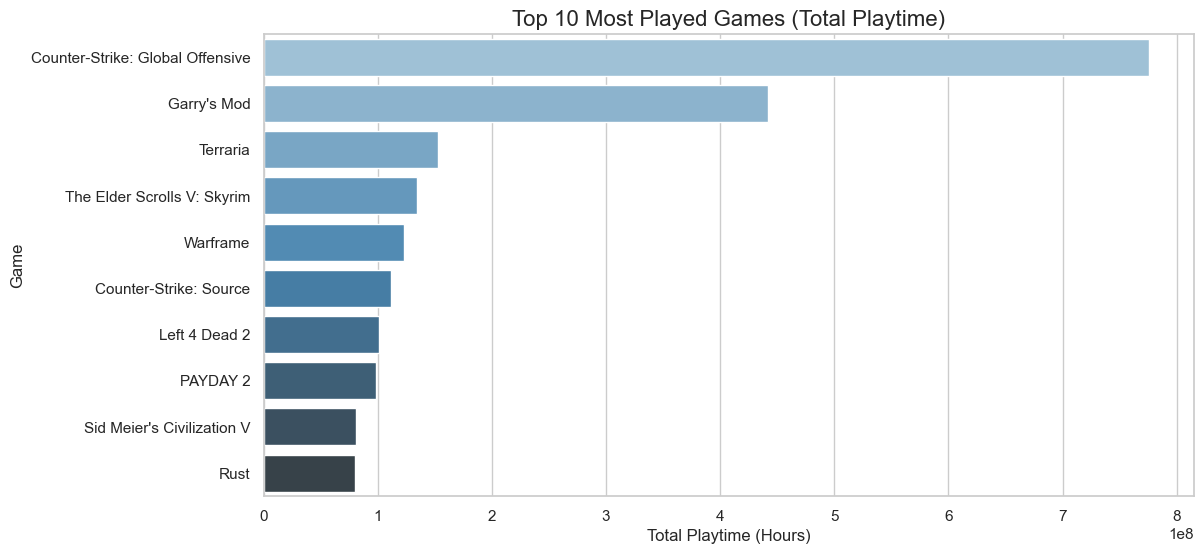

In [107]:
# Agrupar por nombre del juego y sumar el tiempo total jugado
total_playtime_per_game = df_items.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordenar de mayor a menor y seleccionar los 10 juegos más populares
top_10_most_played_games = total_playtime_per_game.sort_values(by='playtime_forever', ascending=False).head(10)

# Graficar los 10 juegos más jugados
plt.figure(figsize=(12, 6))
sns.barplot(x='playtime_forever', y='item_name', data=top_10_most_played_games, palette='Blues_d')

# Etiquetas y título del gráfico
plt.title('Top 10 Most Played Games (Total Playtime)', fontsize=16)
plt.xlabel('Total Playtime (Hours)', fontsize=12)
plt.ylabel('Game', fontsize=12)

# Mostrar el gráfico
plt.show()

3. ¿Qué juegos tienen la mayor retención de jugadores (tiempo jugado en las últimas 2 semanas)?

C:\Users\Sarita\AppData\Local\Temp\ipykernel_17532\2468964762.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='playtime_2weeks', y='item_name', data=top_10_highest_retention_games, palette='Greens_d')


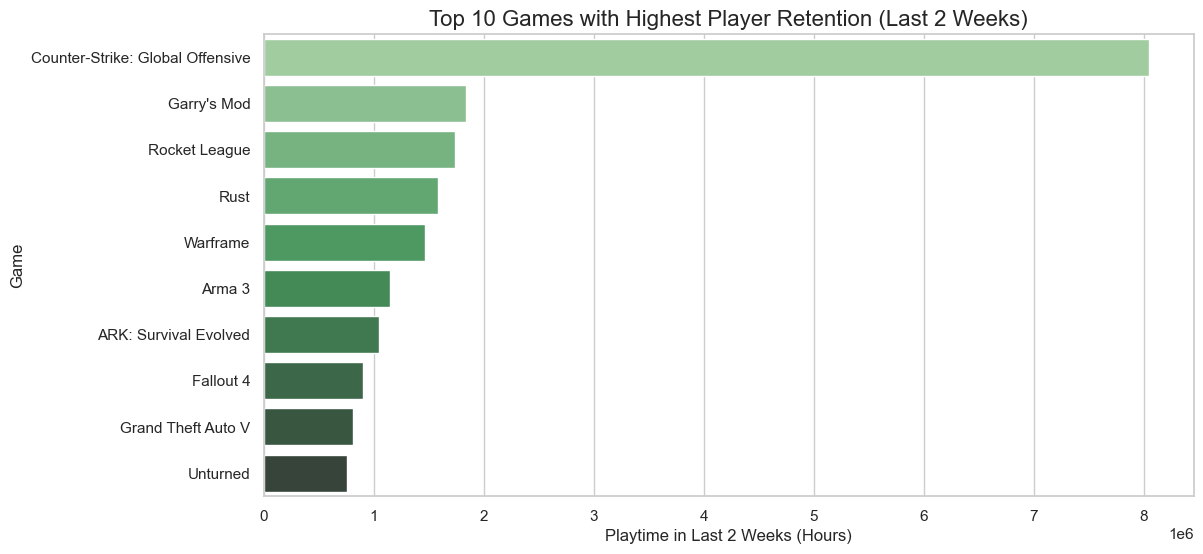

In [108]:
# Agrupar por nombre del juego y sumar el tiempo jugado en las últimas 2 semanas
recent_playtime_per_game = df_items.groupby('item_name')['playtime_2weeks'].sum().reset_index()

# Ordenar de mayor a menor y seleccionar los 10 juegos con mayor retención
top_10_highest_retention_games = recent_playtime_per_game.sort_values(by='playtime_2weeks', ascending=False).head(10)

# Graficar los 10 juegos con mayor retención
plt.figure(figsize=(12, 6))
sns.barplot(x='playtime_2weeks', y='item_name', data=top_10_highest_retention_games, palette='Greens_d')

# Etiquetas y título del gráfico
plt.title('Top 10 Games with Highest Player Retention (Last 2 Weeks)', fontsize=16)
plt.xlabel('Playtime in Last 2 Weeks (Hours)', fontsize=12)
plt.ylabel('Game', fontsize=12)

# Mostrar el gráfico
plt.show()